In [1]:
import numpy as np
import json
import matplotlib.pyplot as plt

In [2]:
filename = 'data_N10000000_k1000_Nexp10_-1.5272758204764476.json'

with open(filename, 'r') as json_file:
    data = json.load(json_file)

data

{'pool_name': 'QE',
 'initial_energy': -1.5018976144430205,
 'fci_energy': -1.5272758204764476,
 'data_list': [{'energies_statevector': [-1.5018976144430205],
   'energies_uniform': [-1.5019207647073347],
   'energies_vmsa': [-1.501940468611279],
   'energies_vpsr': [-1.5018750598744386],
   'std_uniform': [7.959303793444954e-05],
   'std_vmsa': [0.0001547745919124294],
   'std_vpsr': [0.0001315707602247568],
   'shots_uniform': [[588236,
     588236,
     588236,
     588236,
     588236,
     588235,
     588235,
     588235,
     588235,
     588235,
     588235,
     588235,
     588235,
     588235,
     588235,
     588235,
     588235]],
   'shots_vmsa': [[501917,
     501885,
     501821,
     501885,
     770068,
     740418,
     754212,
     770434,
     736915,
     740340,
     729916,
     726960,
     500827,
     501920,
     501920,
     501559,
     1]],
   'shots_vpsr': [[459474,
     459364,
     457846,
     459143,
     676809,
     680230,
     695062,
     66411

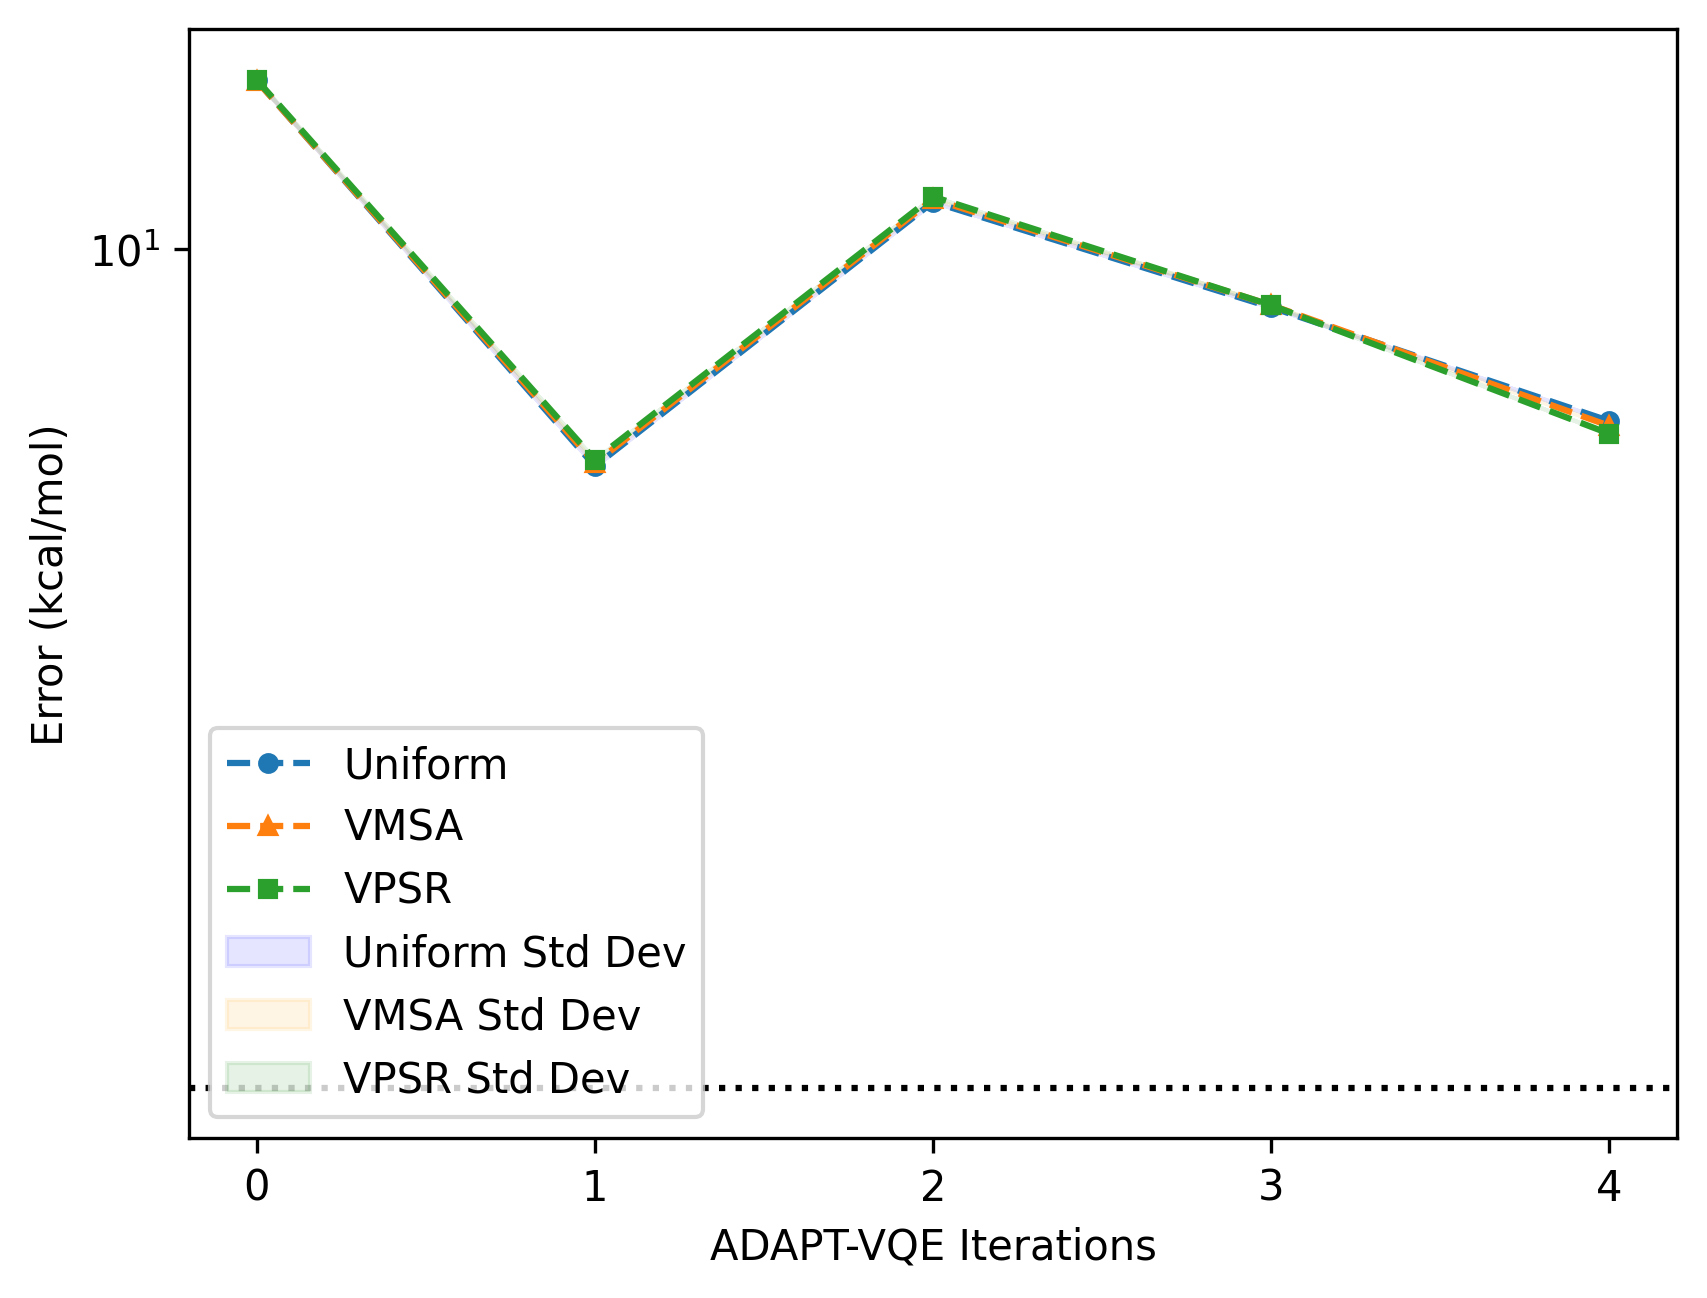

In [64]:
plt.rcParams['figure.dpi'] = 300
exact_energy = data['fci_energy']
chemac = 627.5094

energies_statevector = []
energies_uniform = []
energies_vmsa = []
energies_vpsr = []

std_uniform = []
std_vmsa = []
std_vpsr = []

for i in range(len(data['data_list'])):
    energies_statevector.append(data['data_list'][i]['energies_statevector'][-1])
    energies_uniform.append(data['data_list'][i]['energies_uniform'][-1])
    energies_vmsa.append(data['data_list'][i]['energies_vmsa'][-1])
    energies_vpsr.append(data['data_list'][i]['energies_vpsr'][-1])
    
    std_uniform.append(data['data_list'][i]['std_uniform'][-1])
    std_vmsa.append(data['data_list'][i]['std_vmsa'][-1])
    std_vpsr.append(data['data_list'][i]['std_vpsr'][-1])


error_statevector = np.abs(np.array(energies_statevector) - exact_energy)*chemac
error_uniform = np.abs(np.array(energies_uniform) - exact_energy)*chemac
error_vmsa = np.abs(np.array(energies_vmsa) - exact_energy)*chemac
error_vpsr = np.abs(np.array(energies_vpsr) - exact_energy)*chemac


# # Removing indices 
# indices_to_remove = [1,2,3,4,5,6,7,8,9]

# # Apply np.delete to remove indices 2 and 3 from all relevant arrays
# energies_statevector = np.delete(energies_statevector, indices_to_remove)
# energies_uniform = np.delete(energies_uniform, indices_to_remove)
# energies_vmsa = np.delete(energies_vmsa, indices_to_remove)
# energies_vpsr = np.delete(energies_vpsr, indices_to_remove)

# error_statevector = np.delete(error_statevector, indices_to_remove)
# error_uniform = np.delete(error_uniform, indices_to_remove)
# error_vmsa = np.delete(error_vmsa, indices_to_remove)
# error_vpsr = np.delete(error_vpsr, indices_to_remove)

# std_uniform = np.delete(std_uniform, indices_to_remove)
# std_vmsa = np.delete(std_vmsa, indices_to_remove)
# std_vpsr = np.delete(std_vpsr, indices_to_remove)


x = range(len(error_statevector))
# plt.plot(x, error_statevector, label='Statevector', linestyle='--', color='black')
plt.plot(x, error_uniform, label='Uniform', linestyle='--', marker='o', markersize=4)
plt.plot(x, error_vmsa, label='VMSA', linestyle='--', marker='^', markersize=4)
plt.plot(x, error_vpsr, label='VPSR', linestyle='--', marker='s', markersize=4)

plt.fill_between(x, error_uniform - std_uniform, error_uniform + std_uniform, color='blue', alpha=0.1, label='Uniform Std Dev')
plt.fill_between(x, error_vmsa - std_vmsa, error_vmsa + std_vmsa, color='orange', alpha=0.1, label='VMSA Std Dev')
plt.fill_between(x, error_vpsr - std_vpsr, error_vpsr + std_vpsr, color='green', alpha=0.1, label='VPSR Std Dev')

plt.axhline(1, color='black', linestyle='dotted')
plt.yscale('symlog', linthresh=1e1)
# plt.yscale('log')
# plt.ylim(-0.3,50)
plt.ylabel("Error (kcal/mol)")
plt.xlabel("ADAPT-VQE Iterations")
plt.xticks([0,1,2,3,4])
plt.legend()

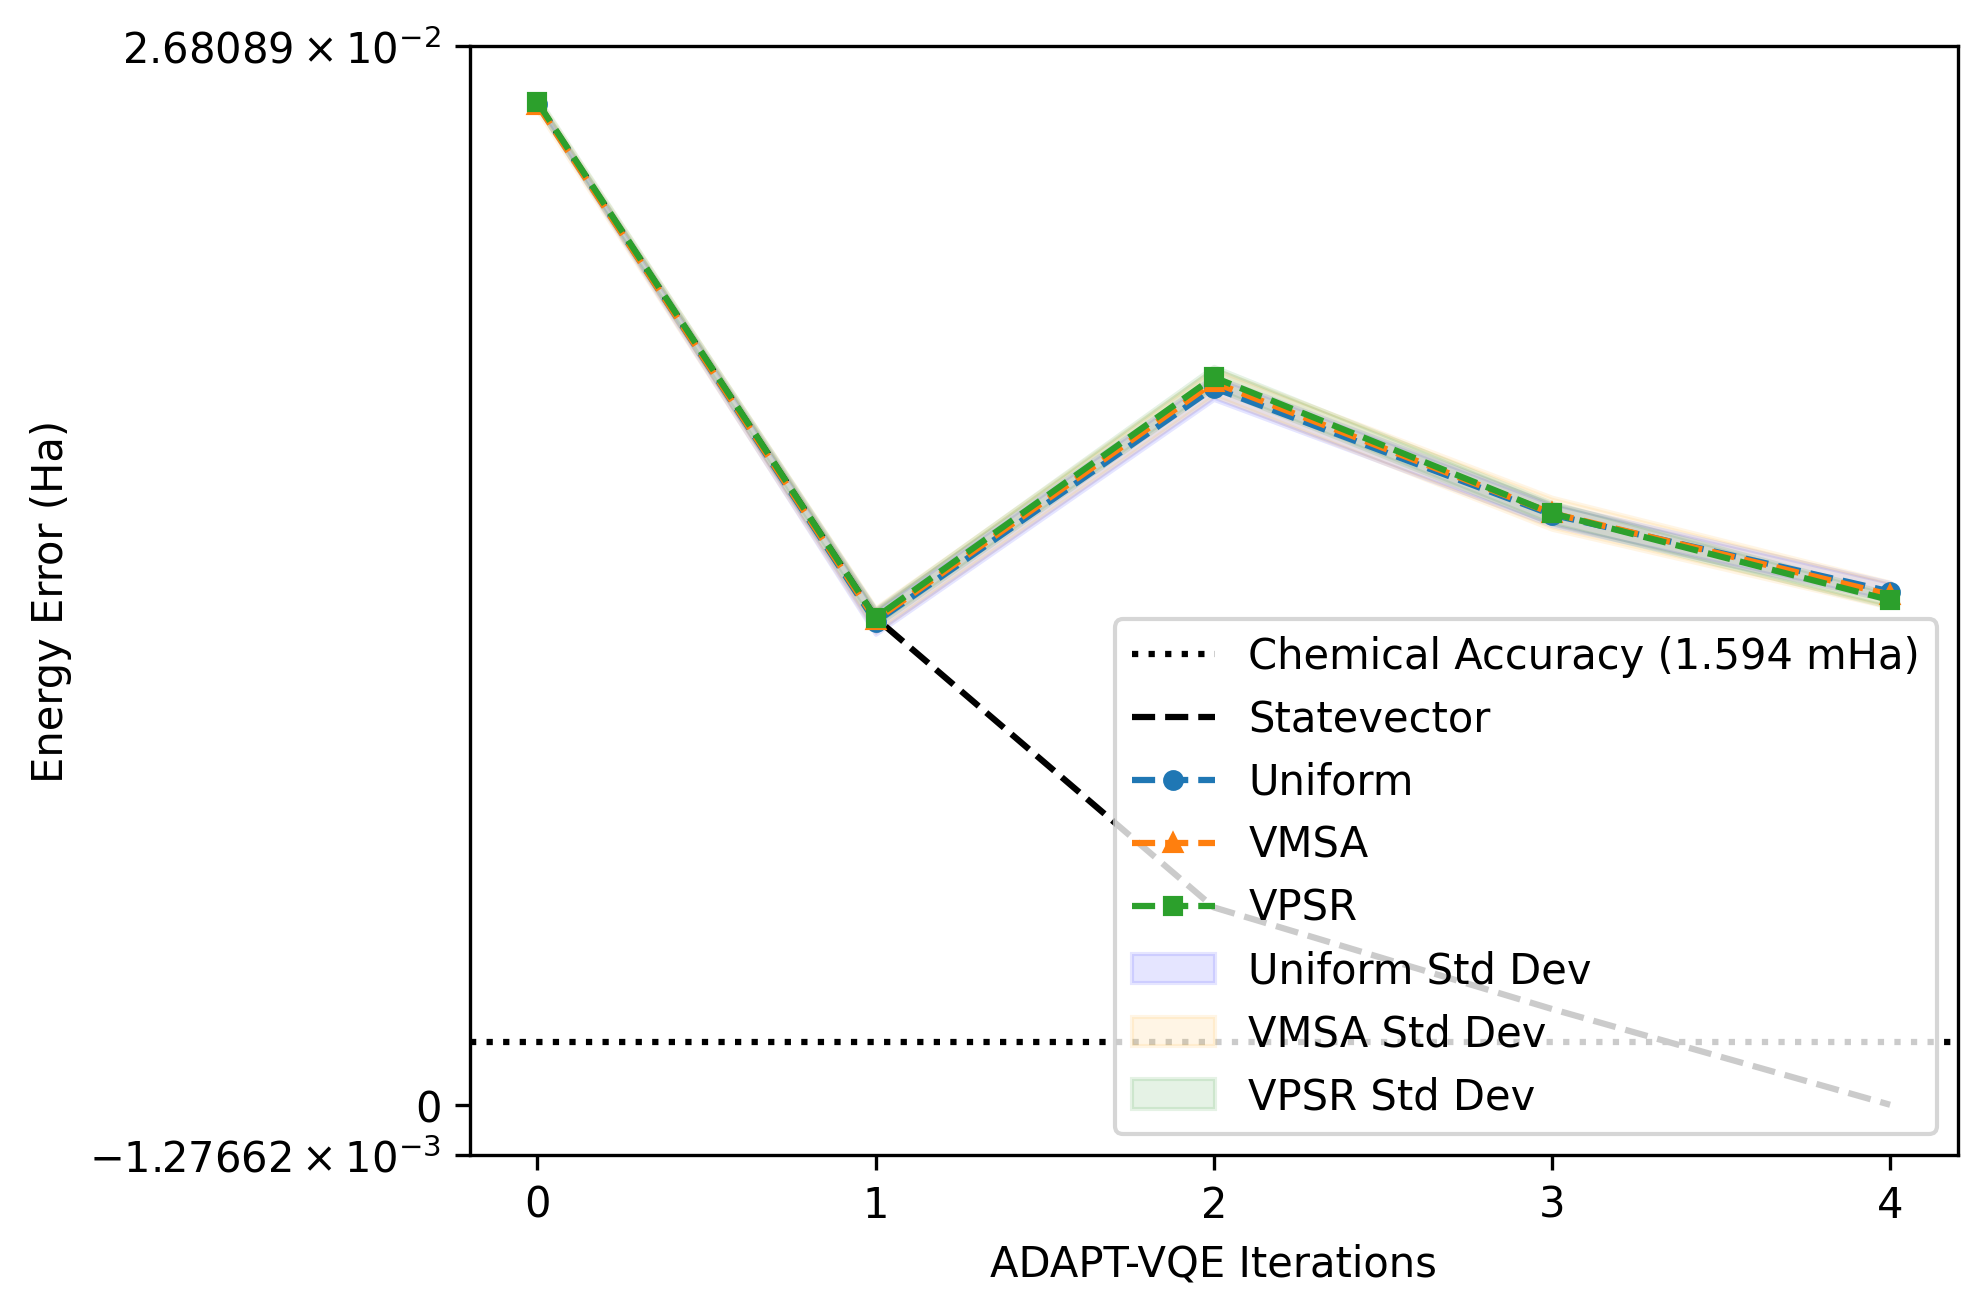

In [70]:
plt.rcParams['figure.dpi'] = 300
exact_energy = data['fci_energy']
chemac = 1

energies_statevector = []
energies_uniform = []
energies_vmsa = []
energies_vpsr = []

std_uniform = []
std_vmsa = []
std_vpsr = []

for i in range(len(data['data_list'])):
    energies_statevector.append(data['data_list'][i]['energies_statevector'][-1])
    energies_uniform.append(data['data_list'][i]['energies_uniform'][-1])
    energies_vmsa.append(data['data_list'][i]['energies_vmsa'][-1])
    energies_vpsr.append(data['data_list'][i]['energies_vpsr'][-1])
    
    std_uniform.append(data['data_list'][i]['std_uniform'][-1])
    std_vmsa.append(data['data_list'][i]['std_vmsa'][-1])
    std_vpsr.append(data['data_list'][i]['std_vpsr'][-1])


error_statevector = np.abs(np.array(energies_statevector) - exact_energy)*chemac
error_uniform = np.abs(np.array(energies_uniform) - exact_energy)*chemac
error_vmsa = np.abs(np.array(energies_vmsa) - exact_energy)*chemac
error_vpsr = np.abs(np.array(energies_vpsr) - exact_energy)*chemac


# # Removing indices 
# indices_to_remove = [1,2,3,4,5,6,7,8,9]

# # Apply np.delete to remove indices 2 and 3 from all relevant arrays
# energies_statevector = np.delete(energies_statevector, indices_to_remove)
# energies_uniform = np.delete(energies_uniform, indices_to_remove)
# energies_vmsa = np.delete(energies_vmsa, indices_to_remove)
# energies_vpsr = np.delete(energies_vpsr, indices_to_remove)

# error_statevector = np.delete(error_statevector, indices_to_remove)
# error_uniform = np.delete(error_uniform, indices_to_remove)
# error_vmsa = np.delete(error_vmsa, indices_to_remove)
# error_vpsr = np.delete(error_vpsr, indices_to_remove)

# std_uniform = np.delete(std_uniform, indices_to_remove)
# std_vmsa = np.delete(std_vmsa, indices_to_remove)
# std_vpsr = np.delete(std_vpsr, indices_to_remove)


x = range(len(error_statevector))

plt.axhline(1.594e-3, color='black', linestyle='dotted', label='Chemical Accuracy (1.594 mHa)')

plt.plot(x, error_statevector, label='Statevector', linestyle='--', color='black')
plt.plot(x, error_uniform, label='Uniform', linestyle='--', marker='o', markersize=4)
plt.plot(x, error_vmsa, label='VMSA', linestyle='--', marker='^', markersize=4)
plt.plot(x, error_vpsr, label='VPSR', linestyle='--', marker='s', markersize=4)

plt.fill_between(x, error_uniform - std_uniform, error_uniform + std_uniform, color='blue', alpha=0.1, label='Uniform Std Dev')
plt.fill_between(x, error_vmsa - std_vmsa, error_vmsa + std_vmsa, color='orange', alpha=0.1, label='VMSA Std Dev')
plt.fill_between(x, error_vpsr - std_vpsr, error_vpsr + std_vpsr, color='green', alpha=0.1, label='VPSR Std Dev')

plt.yscale('symlog', linthresh=1e1)
# plt.yscale('log')
# plt.ylim(0.1,1)
plt.ylabel("Energy Error (Ha)")
plt.xlabel("ADAPT-VQE Iterations")
plt.xticks([0,1,2,3,4])
plt.legend()

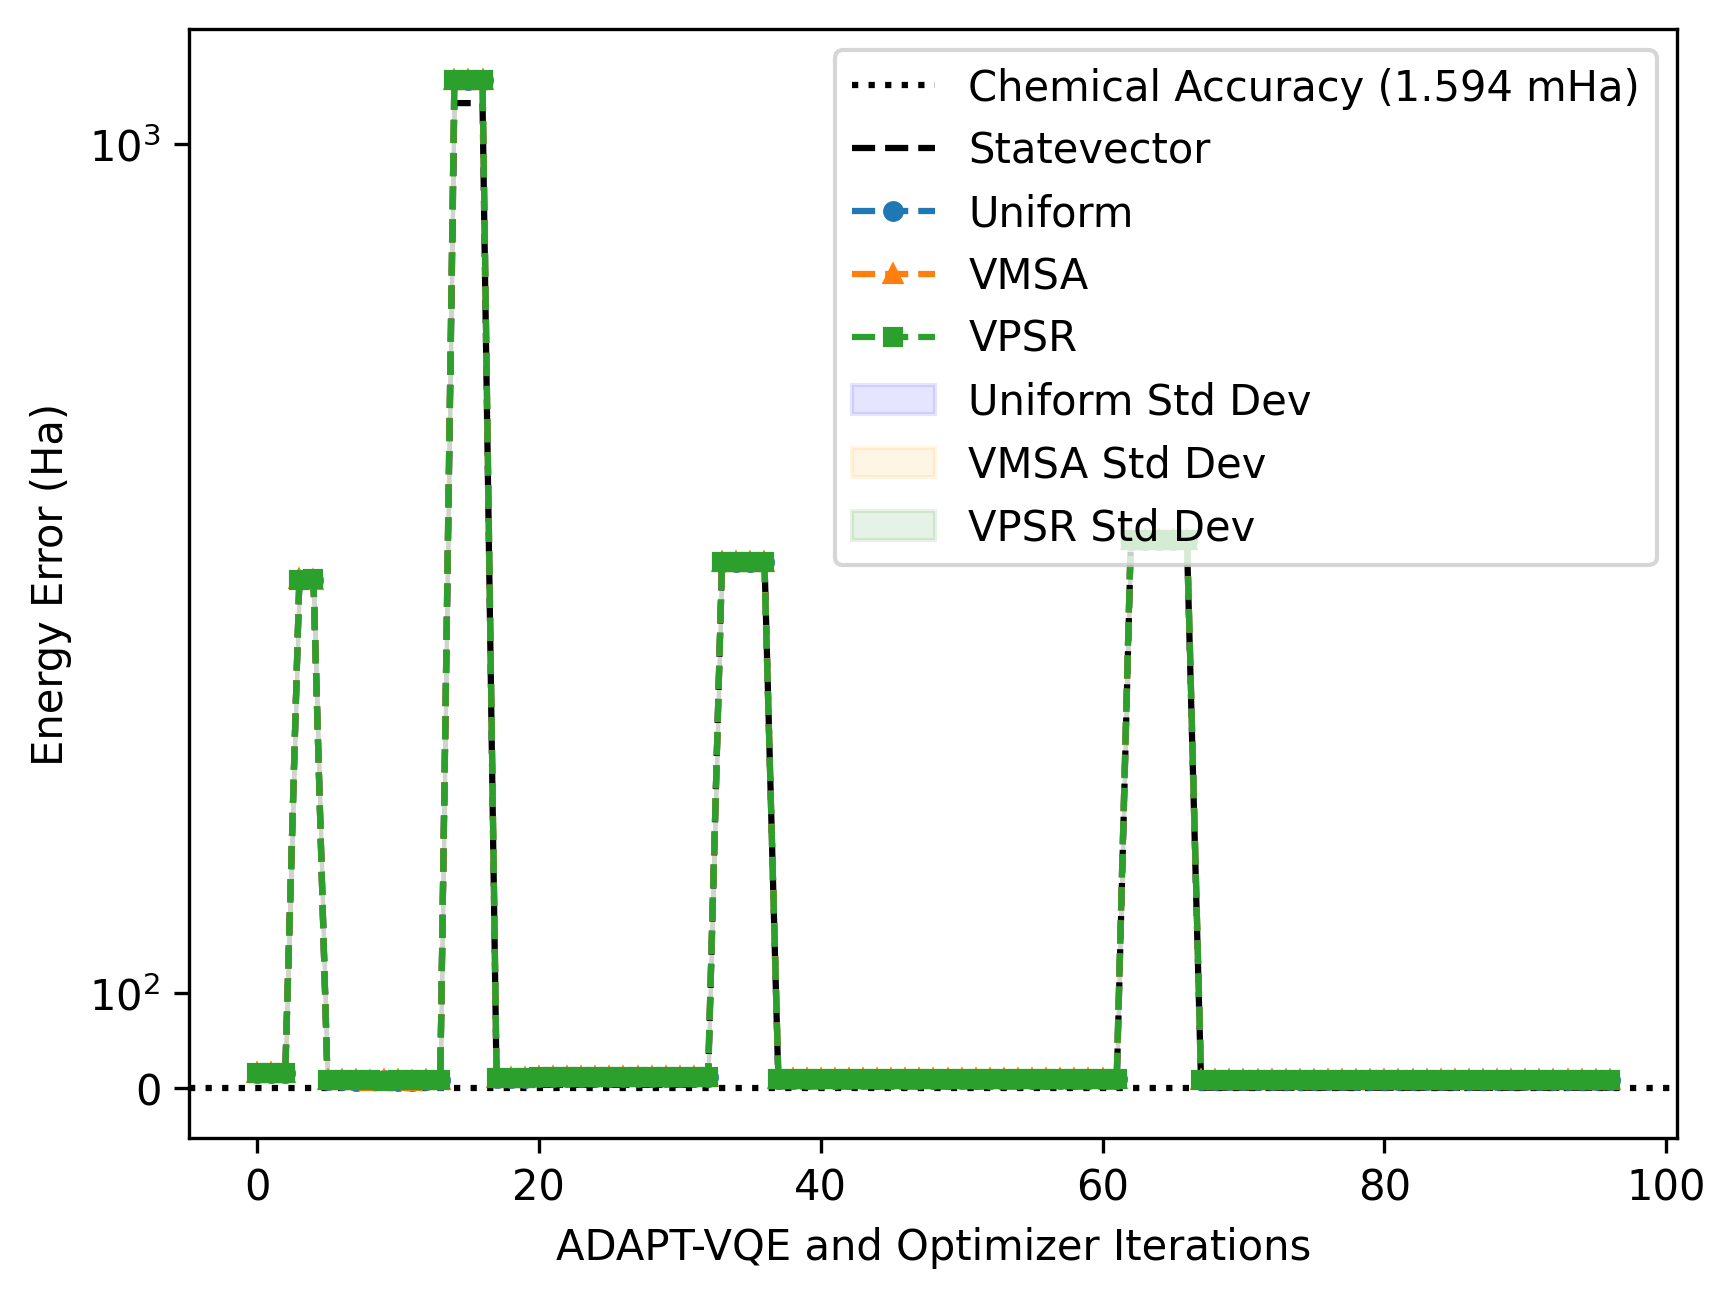

In [85]:
plt.rcParams['figure.dpi'] = 300
exact_energy = data['fci_energy']
chemac = 627.5094

energies_statevector = np.array([])
energies_uniform = np.array([])
energies_vmsa = np.array([])
energies_vpsr = np.array([])

std_uniform = np.array([])
std_vmsa = np.array([])
std_vpsr = np.array([])

for i in range(len(data['data_list'])):
    energies_statevector = np.append(energies_statevector, np.array(data['data_list'][i]['energies_statevector']))
    energies_uniform = np.append(energies_uniform, np.array(data['data_list'][i]['energies_uniform']))
    energies_vmsa = np.append(energies_vmsa, np.array(data['data_list'][i]['energies_vmsa']))
    energies_vpsr = np.append(energies_vpsr, np.array(data['data_list'][i]['energies_vpsr']))
    std_uniform = np.append(std_uniform, np.array(data['data_list'][i]['std_uniform']))
    std_vmsa = np.append(std_vmsa, np.array(data['data_list'][i]['std_vmsa']))
    std_vpsr = np.append(std_vpsr, np.array(data['data_list'][i]['std_vpsr']))


error_statevector = np.abs(np.array(energies_statevector) - exact_energy)*chemac
error_uniform = np.abs(np.array(energies_uniform) - exact_energy)*chemac
error_vmsa = np.abs(np.array(energies_vmsa) - exact_energy)*chemac
error_vpsr = np.abs(np.array(energies_vpsr) - exact_energy)*chemac


# # Removing indices 
# indices_to_remove = [1,2,3,4,5,6,7,8,9]

# # Apply np.delete to remove indices 2 and 3 from all relevant arrays
# energies_statevector = np.delete(energies_statevector, indices_to_remove)
# energies_uniform = np.delete(energies_uniform, indices_to_remove)
# energies_vmsa = np.delete(energies_vmsa, indices_to_remove)
# energies_vpsr = np.delete(energies_vpsr, indices_to_remove)

# error_statevector = np.delete(error_statevector, indices_to_remove)
# error_uniform = np.delete(error_uniform, indices_to_remove)
# error_vmsa = np.delete(error_vmsa, indices_to_remove)
# error_vpsr = np.delete(error_vpsr, indices_to_remove)

# std_uniform = np.delete(std_uniform, indices_to_remove)
# std_vmsa = np.delete(std_vmsa, indices_to_remove)
# std_vpsr = np.delete(std_vpsr, indices_to_remove)


plt.axhline(1.594e-3, color='black', linestyle='dotted', label='Chemical Accuracy (1.594 mHa)')

x = range(len(error_statevector))
plt.plot(x, error_statevector, label='Statevector', linestyle='--', color='black')

plt.plot(x, error_uniform, label='Uniform', linestyle='--', marker='o', markersize=4)
plt.plot(x, error_vmsa, label='VMSA', linestyle='--', marker='^', markersize=4)
plt.plot(x, error_vpsr, label='VPSR', linestyle='--', marker='s', markersize=4)

plt.fill_between(x, error_uniform - std_uniform, error_uniform + std_uniform, color='blue', alpha=0.1, label='Uniform Std Dev')
plt.fill_between(x, error_vmsa - std_vmsa, error_vmsa + std_vmsa, color='orange', alpha=0.1, label='VMSA Std Dev')
plt.fill_between(x, error_vpsr - std_vpsr, error_vpsr + std_vpsr, color='green', alpha=0.1, label='VPSR Std Dev')

plt.yscale('symlog', linthresh=1e3)
# plt.yscale('log')
# plt.xscale('log')
# plt.ylim(-10,1000)
plt.ylabel("Energy Error (Ha)")
plt.xlabel("ADAPT-VQE and Optimizer Iterations")
# plt.xticks([0,1,2,3,4])
plt.legend()

In [71]:
total_shots = np.sum(cumulative_shots_uniform)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (5,) + inhomogeneous part.

In [38]:

print(shots_uniform)
print(cumulative_shots_uniform)
print(shots_vmsa)
print(cumulative_shots_vmsa)

print(energies_statevector)

[[10000000], [10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000], [10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000], [10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000], [10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000]]
[[10000000], [10000

[1.0e+07 1.0e+08 1.8e+08 2.8e+08 4.0e+08]


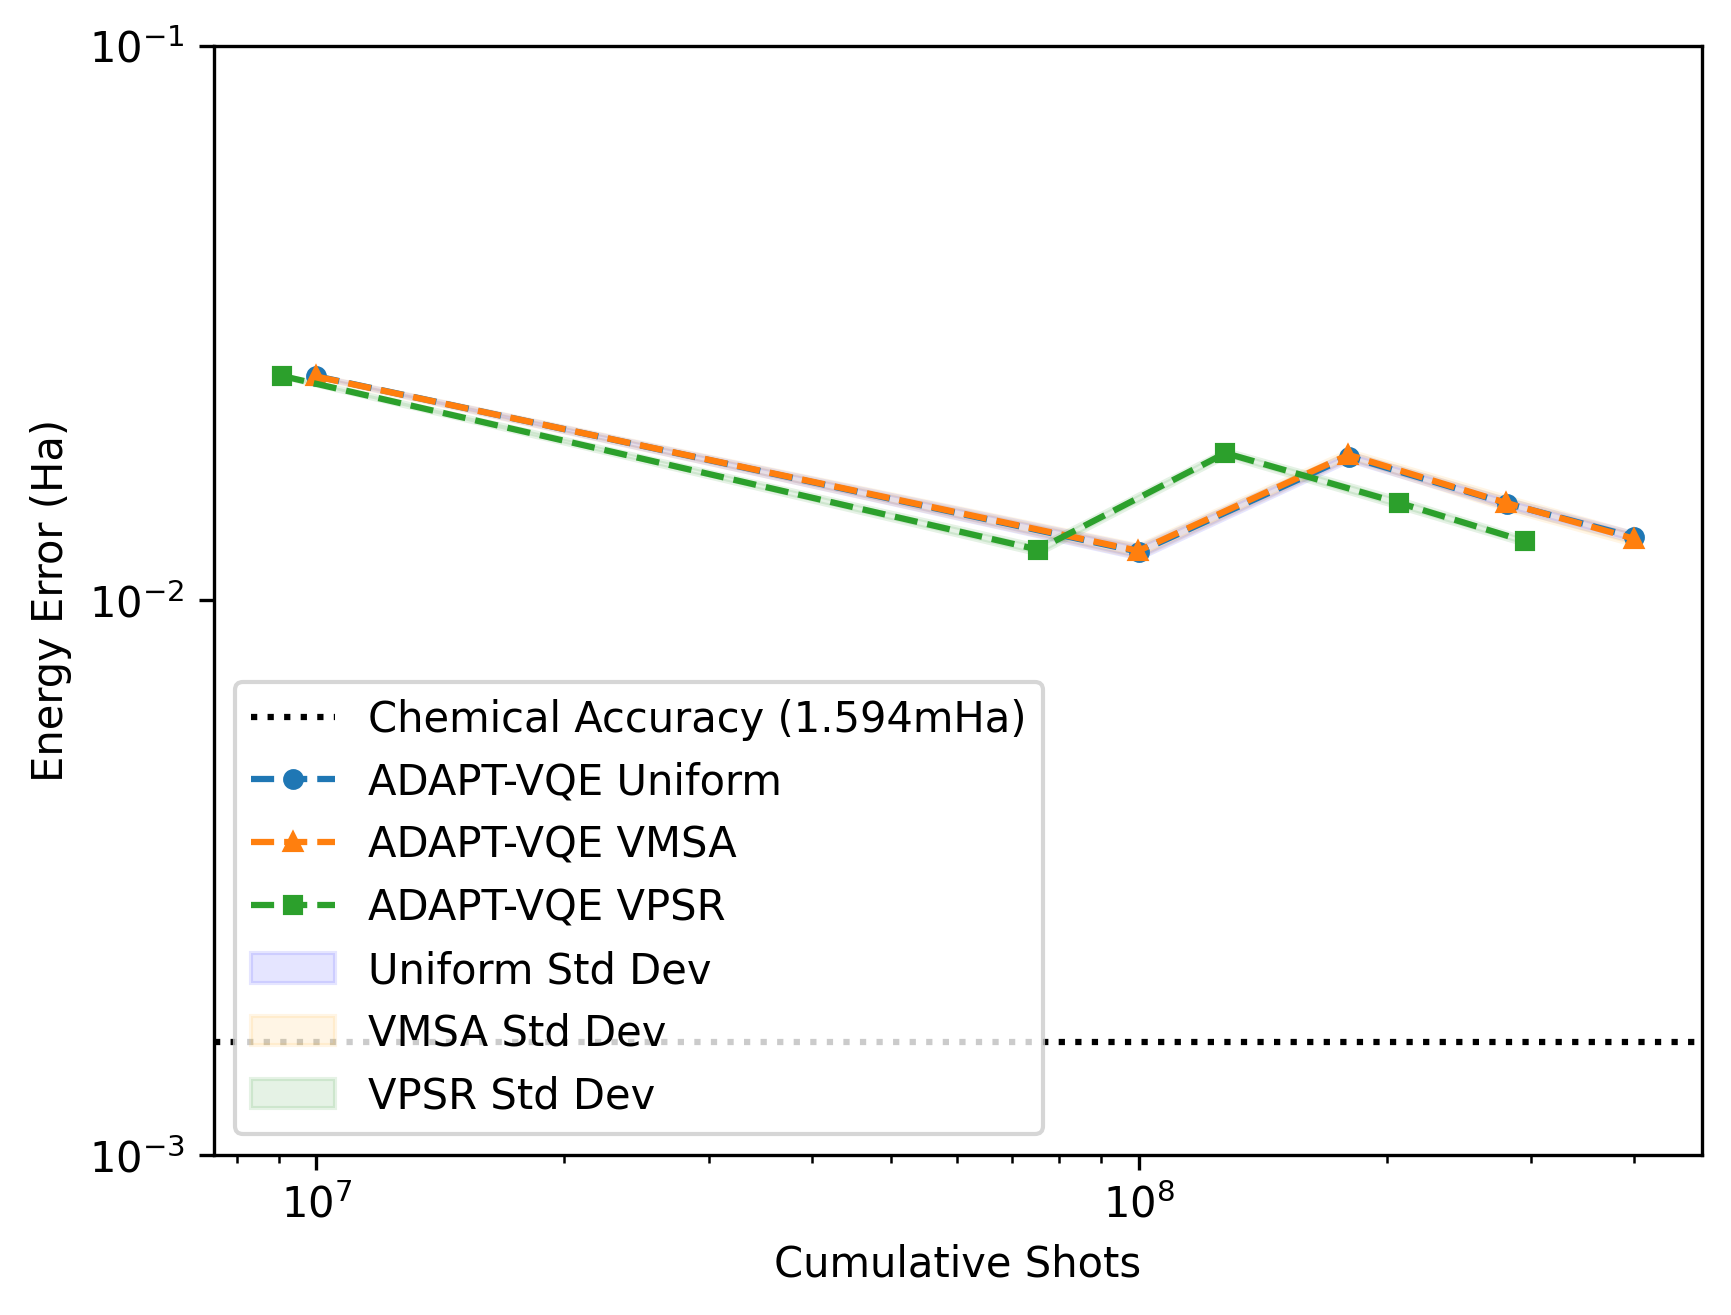

In [59]:
plt.rcParams['figure.dpi'] = 300
exact_energy = data['fci_energy']
chemac = 1

from itertools import accumulate

shots_uniform = []
shots_vmsa = []
shots_vpsr = []

shots_uniform = [ [ np.sum(sublist) for sublist in data['data_list'][i]['shots_uniform'] ] for i in range(len(data['data_list'])) ]
shots_vmsa = [ [ np.sum(sublist) for sublist in data['data_list'][i]['shots_vmsa'] ] for i in range(len(data['data_list'])) ]
shots_vpsr = [ [ np.sum(sublist) for sublist in data['data_list'][i]['shots_vpsr'] ] for i in range(len(data['data_list'])) ]

cumulative_shots_uniform = [list(accumulate(sublist)) for sublist in shots_uniform]
cumulative_shots_vmsa = [list(accumulate(sublist)) for sublist in shots_vmsa]
cumulative_shots_vpsr = [list(accumulate(sublist)) for sublist in shots_vpsr]

shots_uniform_list = np.array([])
shots_vmsa_list = np.array([])
shots_vpsr_list = np.array([])

energies_statevector = np.array([])
energies_uniform = np.array([])
energies_vmsa = np.array([])
energies_vpsr = np.array([])

std_uniform = np.array([])
std_vmsa = np.array([])
std_vpsr = np.array([])



for i in range(len(data['data_list'])):
    energies_statevector = np.append(energies_statevector, np.array(data['data_list'][i]['energies_statevector'][-1]))
    energies_uniform = np.append(energies_uniform, np.array(data['data_list'][i]['energies_uniform'][-1]))
    energies_vmsa = np.append(energies_vmsa, np.array(data['data_list'][i]['energies_vmsa'][-1]))
    energies_vpsr = np.append(energies_vpsr, np.array(data['data_list'][i]['energies_vpsr'][-1]))
    
    std_uniform = np.append(std_uniform, np.array(data['data_list'][i]['std_uniform'][-1]))
    std_vmsa = np.append(std_vmsa, np.array(data['data_list'][i]['std_vmsa'][-1]))
    std_vpsr = np.append(std_vpsr, np.array(data['data_list'][i]['std_vpsr'][-1]))
    
    shots_uniform_list = np.append(shots_uniform_list, cumulative_shots_uniform[i][-1])
    shots_vmsa_list = np.append(shots_vmsa_list, cumulative_shots_vmsa[i][-1])
    shots_vpsr_list = np.append(shots_vpsr_list, cumulative_shots_vpsr[i][-1])

print(shots_uniform_list)

error_statevector = np.abs(np.array(energies_statevector) - exact_energy)*chemac
error_uniform = np.abs(np.array(energies_uniform) - exact_energy)*chemac
error_vmsa = np.abs(np.array(energies_vmsa) - exact_energy)*chemac
error_vpsr = np.abs(np.array(energies_vpsr) - exact_energy)*chemac

plt.axhline(1.594e-3, color='black', linestyle='dotted', label='Chemical Accuracy (1.594mHa)')

plt.plot(shots_uniform_list, error_uniform, label='ADAPT-VQE Uniform', linestyle='--', marker='o', markersize=4)
plt.plot(shots_vmsa_list, error_vmsa, label='ADAPT-VQE VMSA', linestyle='--', marker='^', markersize=4)
plt.plot(shots_vpsr_list, error_vpsr, label='ADAPT-VQE VPSR', linestyle='--', marker='s', markersize=4)

plt.fill_between(shots_uniform_list, error_uniform - std_uniform, error_uniform + std_uniform, color='blue', alpha=0.1, label='Uniform Std Dev')
plt.fill_between(shots_vmsa_list, error_vmsa - std_vmsa, error_vmsa + std_vmsa, color='orange', alpha=0.1, label='VMSA Std Dev')
plt.fill_between(shots_vpsr_list, error_vpsr - std_vpsr, error_vpsr + std_vpsr, color='green', alpha=0.1, label='VPSR Std Dev')


plt.yscale('symlog', linthresh=1e-20)

plt.xscale('log')
plt.ylim(0.001,0.1)

plt.ylabel("Energy Error (Ha)")
plt.xlabel("Cumulative Shots")
# plt.xticks([0,1,2,3,4])
plt.legend()

In [81]:
totalshots_uniform = sum(sum(sublist) for sublist in shots_uniform)
totalshots_vmsa = sum(sum(sublist) for sublist in shots_vmsa)
totalshots_vpsr = sum(sum(sublist) for sublist in shots_vpsr)

print(totalshots_uniform)
print(totalshots_vmsa)
print(totalshots_vpsr)

970000000
968350986
713417480


Text(0, 0.5, 'Number of Shots')

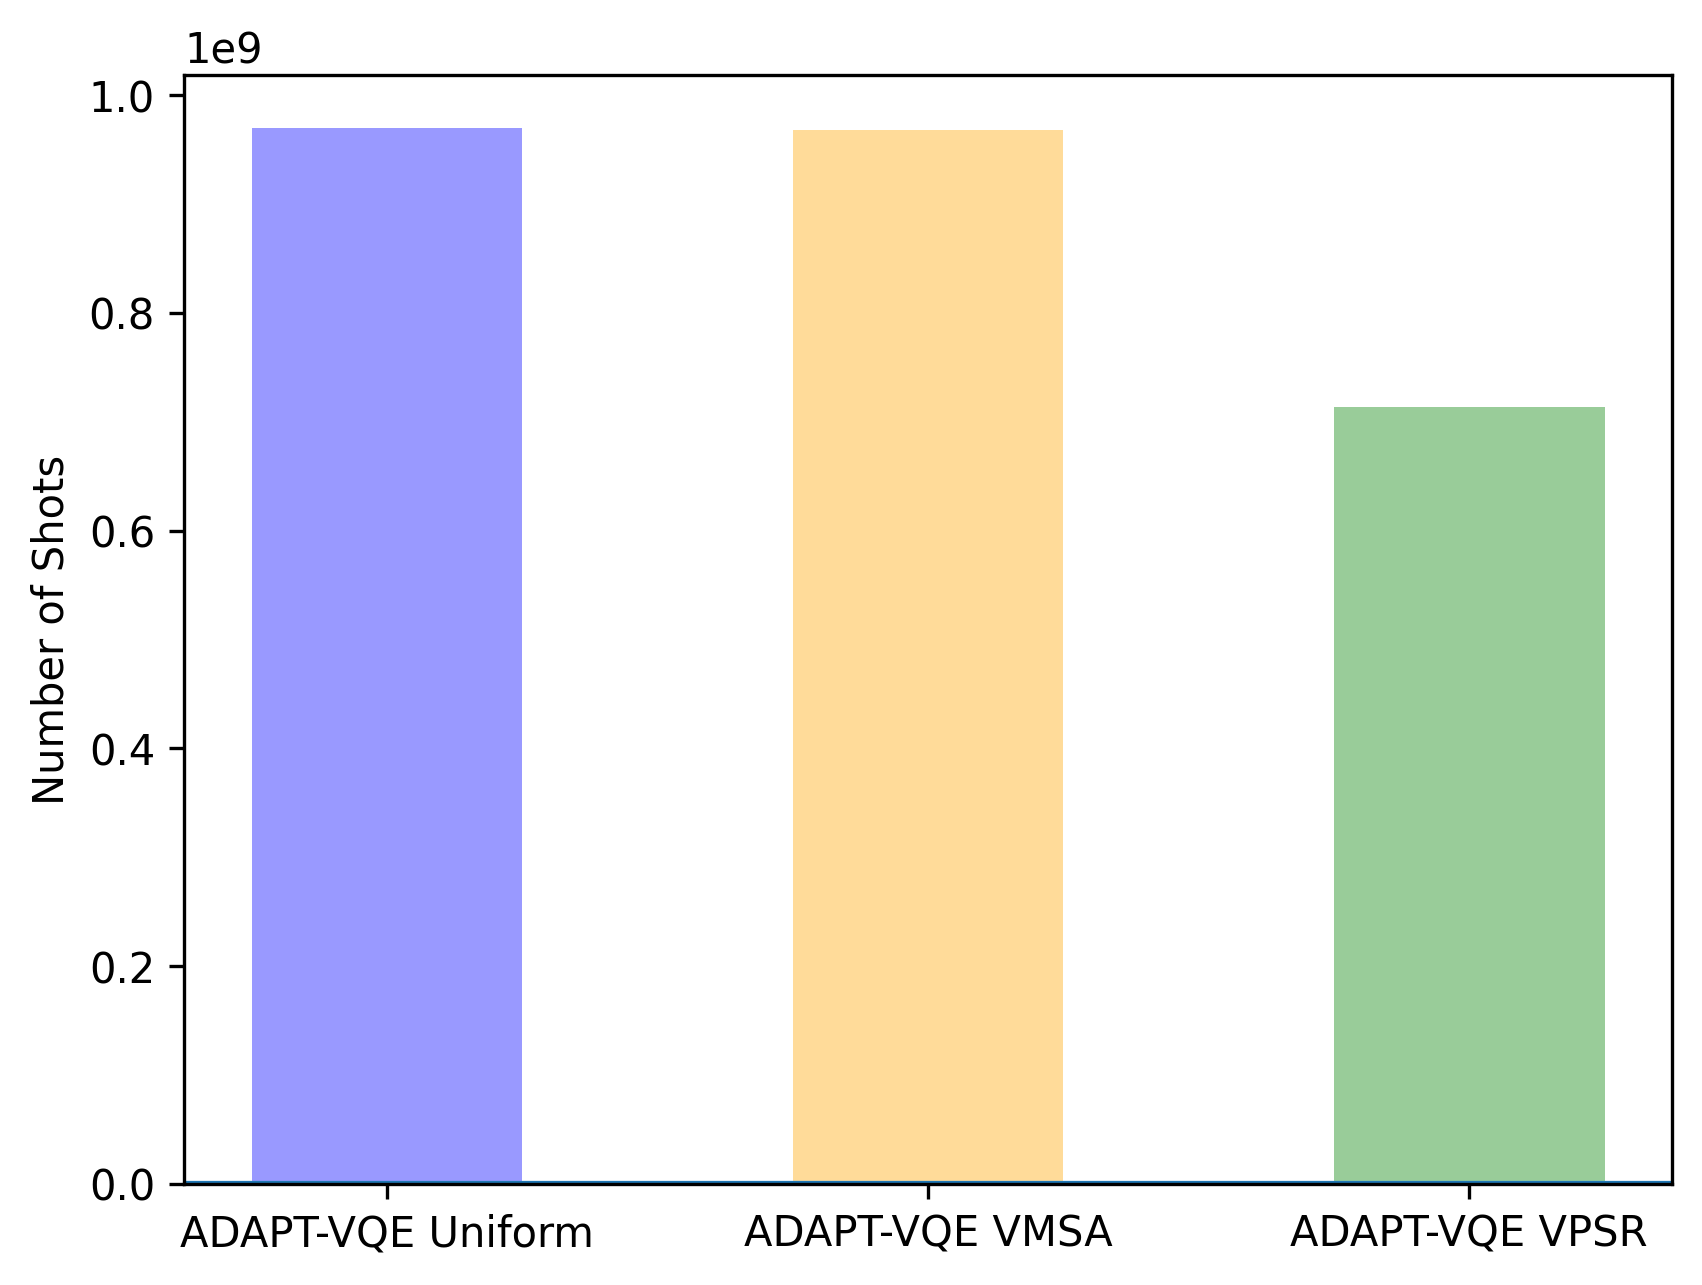

In [83]:
plt.rcParams['figure.dpi'] = 300
w = 0.5
alp = 0.4

plt.bar('ADAPT-VQE Uniform', totalshots_uniform, width=w, alpha=alp, color='blue')
plt.bar('ADAPT-VQE VMSA', totalshots_vmsa, width=w, alpha=alp, color='orange')
plt.bar('ADAPT-VQE VPSR', totalshots_vpsr, width=w, alpha=alp, color='green')
# plt.bar("ADAPT-VQE Uniform", end_shots_uniform, bottom=26500000, width=w, alpha=0.25, color='blue')

plt.axhline()
plt.ylabel("Number of Shots")